# Regresión Lineal Múltiple        Diego Jafet Garza Segovia

Primeramente, importo la libreria de pandas (pd) y guardo los datos en el csv de NASA en la variable AE.

Para saber la dimension y tipo de datos que tiene esta base de datos, imprimo su data frame (filas, columnas) usando shape y head (primeras 15 filas de datos).

In [34]:
import pandas as pd
AE = pd.read_csv("A1.3 NASA.csv")
print("Dimensiones del data frame:", AE.shape)
print(AE.head(15))

Dimensiones del data frame: (1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500   

Segun la tabla de arriba, se puede ver que la base de datos esta compuesta de 6 columnas: frecuencia, angulo, longitud, velocidad, espesor y presion. Tambien se ve que contiene un total de 1503 datos.

Se repartiran de manera aleatoria estos 1503 datos, un 70% para el entrenamiento de un modelo (1052 datos), y un 30% para la prueba de dicho modelo (451 datos). Se usaran las funciones sample() y drop() respectivamente, y se imprimiran en consola las dimensiones para comprobar que se hayan repartido adecuadamente.

In [35]:
entre = AE.sample(frac=0.7)
prueba = AE.drop(entre.index)

print("Dimensiones de datos de entrenamiento: ", entre.shape)
print("Dimensiones de datos de prueba: ", prueba.shape)

Dimensiones de datos de entrenamiento:  (1052, 6)
Dimensiones de datos de prueba:  (451, 6)


Usando la funcion OLS(), se obtendra un resumen del modelo (coeficiente estimado de cada variable, p-value, etc). Se estara intentando predecir la variable "presion" usando las otras 5 variables, por lo que esta 6ta variable tomara el lugar de "y" y las demas de "x".

Para esto se debera de importar la libreria statsmodels.api (sm) y guardar la variable X como los datos de las primeras 5 variables, y Y de los datos de presion (de entrenamiento).

Tambien se imprimira en la consola valores mas precisos de las variables.

In [36]:
import statsmodels.api as sm

X = entre[['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']]
Y = entre['presion']

X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
print(modelo.summary())
print("\np-values precisos: ")
print(modelo.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     232.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          4.53e-167
Time:                        06:56:10   Log-Likelihood:                -3129.6
No. Observations:                1052   AIC:                             6271.
Df Residuals:                    1046   BIC:                             6301.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.8657      0.654    203.296      0.0

Para verificar que existe al menos una variable significativa en el modelo, tendremos como hipotesis nula que todos los coeficientes son igual a 0, y de alternativa que al menos un coeficiente es distinto a 0. Se guardara en la variable "variables" todos los p-values que sean menor a 0.05 y seran impresos en la consola. En el caso que no se imprima ninguna variable, no habra evidencia suficiente para rechazar la hipotesis nula.

In [37]:
variables = modelo.pvalues[modelo.pvalues < 0.05]
print("Variables significativas con p-value menor a 0.05: \n", variables)

Variables significativas con p-value menor a 0.05: 
 const          0.000000e+00
frecuencia    8.532305e-116
angulo         1.098234e-22
longitud       1.713059e-67
velocidad      4.916128e-26
espesor        5.214859e-15
dtype: float64


Segun los datos de arriba, se pueden ver que todos los p-value son menor a 0.05, dando evidencia suficiente para rechazar la h0.

Para ver cual cual variable es la mas importante del modelo, con la mayor asociacion lineal significativa de todas, se utilizaran los valores respectivos de t-value ya que muestra la relacion entre el coeficiente y su error estandar, y tiende a ser utilizado para determinar su significancia.

No se utiliza directamente el valor de los coeficientes (a pesar de que muestra su relacion directa con el modelo) ya que las variables pueden tener escalas distintas.

In [38]:
print("\nValores t-value absoluto de las variables: \n", modelo.tvalues.abs())


Valores t-value absoluto de las variables: 
 const         203.296480
frecuencia     26.063041
angulo         10.034491
longitud       18.691490
velocidad      10.843010
espesor         7.939334
dtype: float64


Segun los t-value, la variable con mayor significancia es la frecuencia.

Ahora, se calculara el Residual Standard Error (RSE) y Coeficiente de Determinacion (R^2) tanto para los datos de entrenamiento como los de prueba. 

Para los datos del entrenamiento, se utilizaran los atributos scale (y su raiz cuadrada) y rsquared.

Para los datos de prueba, se crearan nuevas variables con sus datos respectivos de prueba, y se calculara el RSS y TSS con fin de poder calcular el RES y R^2. 

In [39]:
import numpy as np

RSEentre = np.sqrt(modelo.scale)
R2entre = modelo.rsquared

Xprueba = prueba[['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']]
Yprueba = prueba['presion']

Xprueba = sm.add_constant(Xprueba)
Ygorrito = modelo.predict(Xprueba)

RSS = np.sum((Yprueba - Ygorrito)**2)
RSEprueba = np.sqrt(RSS / (len(Yprueba) - Xprueba.shape[1]))

TSS = np.sum((Yprueba - np.mean(Yprueba))**2)
R2prueba = 1 - (RSS/TSS)

print("RSE (entrenamiento) = ", RSEentre)
print("R^2 (entrenamiento) = ", R2entre)
print("RSE (prueba) = ", RSEprueba)
print("R^2 (prueba) = ", R2prueba)


RSE (entrenamiento) =  4.753071935031624
R^2 (entrenamiento) =  0.5266570171363003
RSE (prueba) =  4.981217394929864
R^2 (prueba) =  0.48784220296364256


Finalmente, se hara una grafica de los datos recopilados y su recta lineal que describe la tendencia. En el eje "x" estaran los datos de la presion real, y en el eje "y" estaran los datos de la presion estimada.

Para esto se debera importar la libreria matplotlib.pyplot (plt)

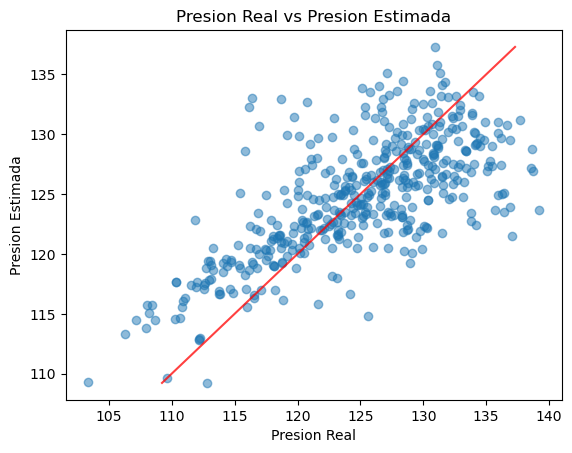

In [40]:
import matplotlib.pyplot as plt

plt.scatter(Yprueba, Ygorrito, alpha = 0.5)
plt.plot([Ygorrito.min(), Ygorrito.max()], [Ygorrito.min(), Ygorrito.max()], color="red", alpha=0.75)
plt.xlabel("Presion Real")
plt.ylabel("Presion Estimada")
plt.title("Presion Real vs Presion Estimada")
plt.show()

Segun la grafica de arriba, se puede notar que la pendiente NO es de 1, es decir, que no es un modelo perfecto. Sin embargo, es un valor cercano a este, por lo que se puede decir que fue adecuadamente ajustado, indicando una alta cercania entre la presion estimada y la presion real (R^2 = 0.53 entrenamiento vs R^2 = 0.49 prueba).

Esto quiere decir, que el modelo obtenido es de relativamente alta precision, significando que puede ser utilizado para predecir valores de presion, pero no con una certeza del 100%